In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import  RFE, mutual_info_regression

##Loading the DataSet

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Worksheet ML/Final Portfolio/owid-energy-data.csv")
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


##EDA

In [13]:
df_cleaned = df.drop(columns=[col for col in df.columns if df[col].isnull().sum() / len(df) > 0.4 and col != "primary_energy_consumption"])

numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     21812 non-null  object 
 1   year                        21812 non-null  int64  
 2   iso_code                    16812 non-null  object 
 3   population                  21812 non-null  float64
 4   coal_prod_change_twh        21812 non-null  float64
 5   coal_prod_per_capita        21812 non-null  float64
 6   coal_production             21812 non-null  float64
 7   gas_prod_change_twh         21812 non-null  float64
 8   gas_prod_per_capita         21812 non-null  float64
 9   gas_production              21812 non-null  float64
 10  oil_prod_change_twh         21812 non-null  float64
 11  oil_prod_per_capita         21812 non-null  float64
 12  oil_production              21812 non-null  float64
 13  primary_energy_consumption  218

In [15]:
df_cleaned.describe()

,year,population,coal_prod_change_twh,coal_prod_per_capita,coal_production,gas_prod_change_twh,gas_prod_per_capita,gas_production,oil_prod_change_twh,oil_prod_per_capita,oil_production,primary_energy_consumption
count,21812.000000,2.181200e+04,21812.000000,21812.000000,21812.000000,21812.000000,21812.000000,21812.000000,21812.000000,2.181200e+04,21812.000000,21812.000000
mean,1974.195718,9.022352e+07,12.698827,2353.609614,747.255425,13.377297,4482.821399,481.625063,18.739921,1.799710e+04,995.146633,2473.003854
std,35.342860,4.305121e+08,171.016568,8076.069240,3113.263041,89.371680,30902.621051,2130.249732,189.078741,1.377231e+05,3786.680953,11551.636234
min,1900.000000,1.833000e+03,-2380.352000,0.000000,0.000000,-1147.562000,0.000000,0.000000,-5200.857000,0.000000e+00,0.000000,0.000000
25%,1946.000000,2.592186e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,57.194500
50%,1984.000000,6.998022e+06,0.000000,29.634000,1.351000,0.000000,0.000000,0.000000,0.000000,6.084000e+00,1.365500,85.812000
75%,2004.000000,1.895002e+07,0.057000,394.933750,28.098250,0.024000,79.290250,14.674500,0.140000,5.116107e+02,68.131000,133.795500
max,2023.000000,8.045311e+09,3162.273000,151662.266000,49789.156000,2093.012000,852961.562000,40592.312000,2795.154000,3.493139e+06,52432.227000,172119.062000


In [16]:
#Checking the null values
print(f"The number of null values in each row:\n{df_cleaned.isnull().sum()}")

The number of null values in each row:
country                          0
year                             0
iso_code                      5000
population                       0
coal_prod_change_twh             0
coal_prod_per_capita             0
coal_production                  0
gas_prod_change_twh              0
gas_prod_per_capita              0
gas_production                   0
oil_prod_change_twh              0
oil_prod_per_capita              0
oil_production                   0
primary_energy_consumption       0
dtype: int64


Since most of the attributes are numeric in nature let us check if there are Not a number values in the dataset.

In [17]:
np.isnan(df_cleaned.select_dtypes(include="float64")).sum()

,0
population,0
coal_prod_change_twh,0
coal_prod_per_capita,0
coal_production,0
gas_prod_change_twh,0
gas_prod_per_capita,0
gas_production,0
oil_prod_change_twh,0
oil_prod_per_capita,0
oil_production,0


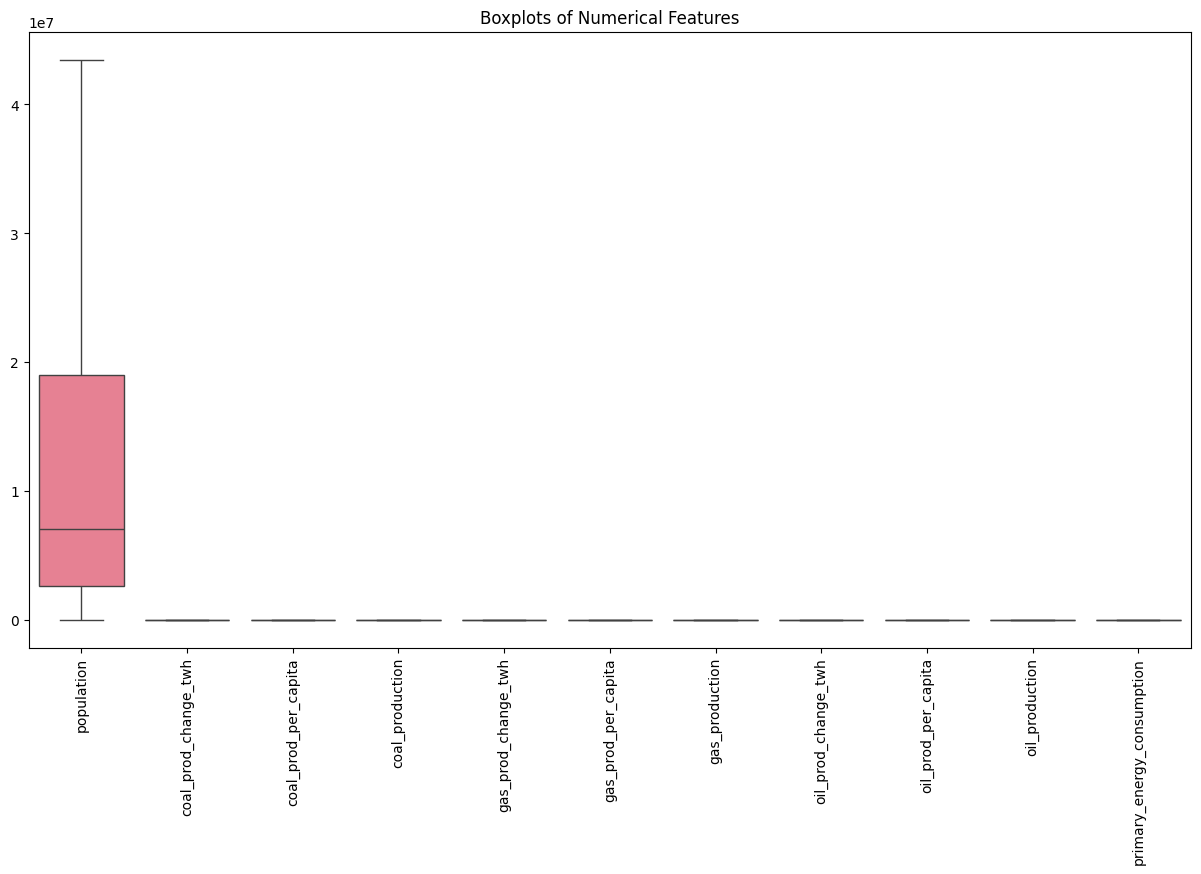

In [24]:
#Function for checking for outliers using boxplot
def outliers_visualizer(X):
  plt.figure(figsize=(15, 8))
  sns.boxplot(data=X.select_dtypes(include=['float64']))
  plt.xticks(rotation=90)  # Rotate labels for readability
  plt.title("Boxplots of Numerical Features")
  plt.show()

#Call the function
outliers_visualizer(df_cleaned)

In [25]:
#Check for outliers
def check_outliers(X):
  numercial_features = X.select_dtypes(include = 'float64').columns
  outlier_counts = {}
  for feature in numercial_features:
      Q1 = X[feature].quantile(0.25)
      Q3 = X[feature].quantile(0.75)
      IQR = Q3 - Q1
      lower_limit = Q1 - 1.5 * IQR
      upper_limit = Q3 + 1.5 * IQR
      # Clip the outliers
      X[feature] = X[feature].clip(lower=lower_limit, upper=upper_limit)

    # Store count of outliers
      outliers = X[(X[feature] < lower_limit) | (X[feature] > upper_limit)]
      outlier_counts[feature] = outliers.shape[0]


  return outlier_counts

#Apply the function
check_outliers(df_cleaned)


{'population': 0,
 'coal_prod_change_twh': 0,
 'coal_prod_per_capita': 0,
 'coal_production': 0,
 'gas_prod_change_twh': 0,
 'gas_prod_per_capita': 0,
 'gas_production': 0,
 'oil_prod_change_twh': 0,
 'oil_prod_per_capita': 0,
 'oil_production': 0,
 'primary_energy_consumption': 0}

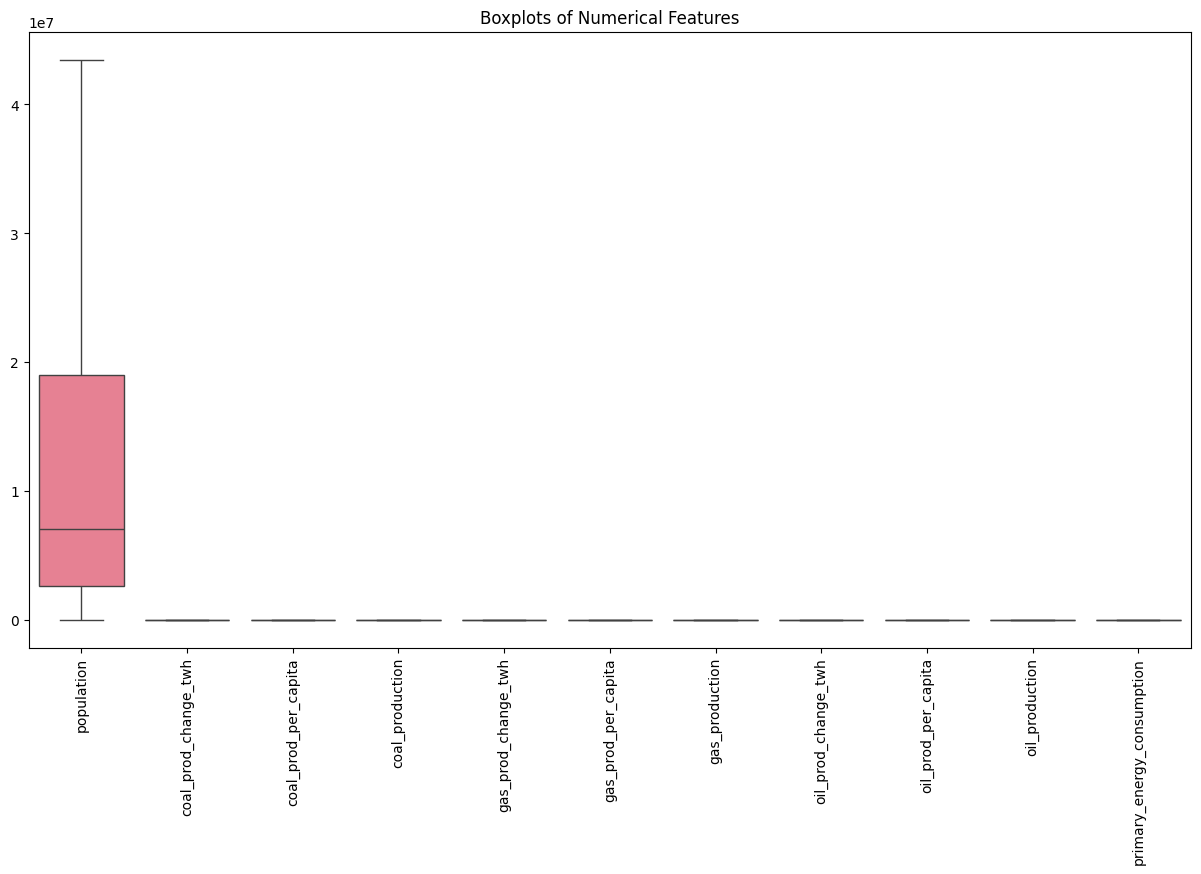

In [26]:
#Visualize outliers after clipping them
outliers_visualizer(df_cleaned)

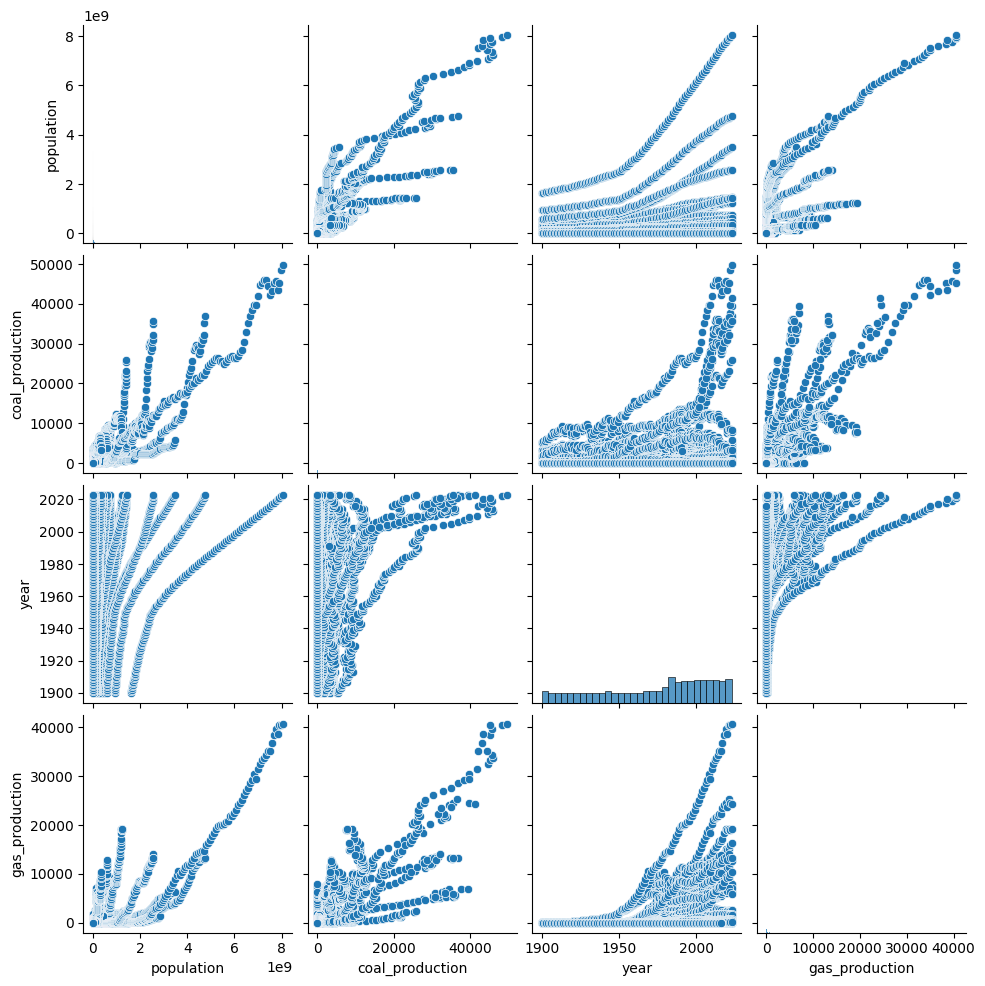

In [29]:
#Visualize the selected features
sns.pairplot(df, vars = ['population', 'coal_production', 'year', 'gas_production'])

In [30]:
# Observe correlations
correlation = df_cleaned.select_dtypes(include= "float64").corr()
correlation

,population,coal_prod_change_twh,coal_prod_per_capita,coal_production,gas_prod_change_twh,gas_prod_per_capita,gas_production,oil_prod_change_twh,oil_prod_per_capita,oil_production,primary_energy_consumption
population,1.000000,0.202188,0.488477,0.537226,0.260879,0.459823,0.432160,0.157856,0.373408,0.378141,0.432587
coal_prod_change_twh,0.202188,1.000000,0.278845,0.311620,0.183652,0.066908,0.142408,0.169525,0.073219,0.163922,0.074216
coal_prod_per_capita,0.488477,0.278845,1.000000,0.694140,0.179745,0.384033,0.273628,0.088365,0.289152,0.190363,0.334636
coal_production,0.537226,0.311620,0.694140,1.000000,0.332705,0.296359,0.514140,0.212826,0.212434,0.479862,0.384336
gas_prod_change_twh,0.260879,0.183652,0.179745,0.332705,1.000000,0.385925,0.506602,0.328606,0.334776,0.496098,0.215678
gas_prod_per_capita,0.459823,0.066908,0.384033,0.296359,0.385925,1.000000,0.685536,0.145832,0.773004,0.502608,0.471218
gas_production,0.432160,0.142408,0.273628,0.514140,0.506602,0.685536,1.000000,0.235163,0.551844,0.797991,0.546581
oil_prod_change_twh,0.157856,0.169525,0.088365,0.212826,0.328606,0.145832,0.235163,1.000000,0.237154,0.351571,0.086173
oil_prod_per_capita,0.373408,0.073219,0.289152,0.212434,0.334776,0.773004,0.551844,0.237154,1.000000,0.591821,0.359648
oil_production,0.378141,0.163922,0.190363,0.479862,0.496098,0.502608,0.797991,0.351571,0.591821,1.000000,0.428790


<Axes: >

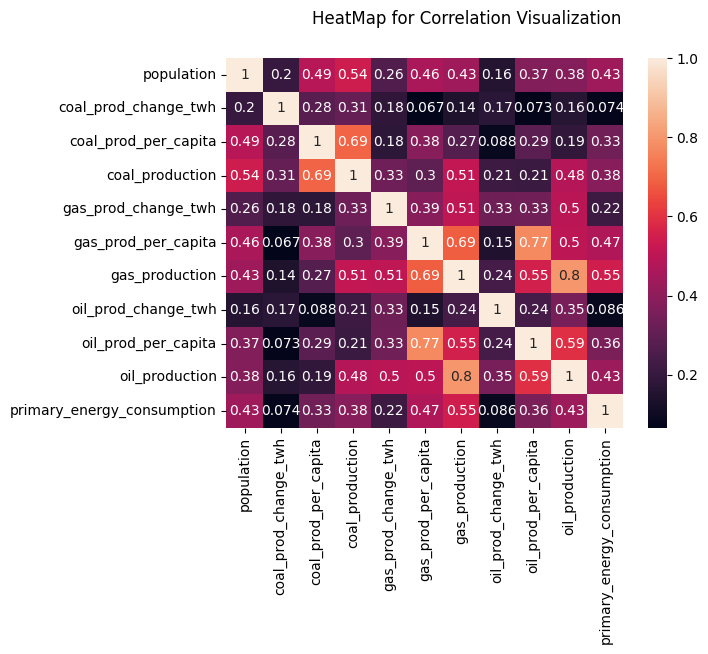

In [31]:
# Heatmap for correlation visaulization
plt.suptitle("HeatMap for Correlation Visualization")
sns.heatmap(data = correlation, annot = True)

## Train Test Split and Normalization

In [32]:
X = df_cleaned.select_dtypes(include=[np.number]).drop(columns=["primary_energy_consumption"], errors='ignore')

if X.empty:
    raise ValueError("No numeric features remaining after cleaning the dataset.")

y = np.log1p(df_cleaned.get("primary_energy_consumption"))

In [33]:
def train_test_split(X, y, test_size = 0.3, random_seed = 42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test
#Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size= 0.3, random_seed= 42)

In [34]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(21812, 11)
(15269, 11)
(6543, 11)
(21812,)
(15269,)
(6543,)


In [35]:
# Standardize the values using normalization
def normalize(df):
    """
    Normalize features using min-max normalization.

    This function scales all features to a range between 0 and 1 using the formula:
    x_normalized = (x - min(x)) / (max(x) - min(x))

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing features to normalize.

    Returns:
    --------
    result : pandas.DataFrame
        Normalized DataFrame with the same shape as input.
    """
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# Convert numpy arrays back to pandas DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Apply normalization to the training and test sets
X_train_normalized = normalize(X_train_df)
X_test_normalized = normalize(X_test_df)

# Print the shapes of the normalized datasets
print(f"X_train_normalized shape: {X_train_normalized.shape}")
print(f"X_test_normalized shape: {X_test_normalized.shape}")

# Print the first few rows of the normalized training set
X_train_normalized.head()

X_train_normalized shape: (15269, 11)
X_test_normalized shape: (6543, 11)


,year,population,coal_prod_change_twh,coal_prod_per_capita,coal_production,gas_prod_change_twh,gas_prod_per_capita,gas_production,oil_prod_change_twh,oil_prod_per_capita,oil_production
0,0.008130,1.000000,0.375000,0.000000,0.000000,0.375,0.0,0.000000,0.375,0.000000,0.000000
1,0.520325,0.280034,0.660088,0.031142,0.005324,1.000,1.0,0.267621,1.000,1.000000,1.000000
2,0.691057,0.160888,0.375000,0.030014,0.000000,0.375,0.0,0.000000,0.375,0.004757,0.000000
3,0.853659,0.160888,1.000000,0.030014,1.000000,0.000,0.0,1.000000,0.000,0.004757,1.000000
4,0.861789,0.113883,0.375000,0.000000,0.000000,0.000,1.0,1.000000,1.000,1.000000,0.682121


##Model 1: Linear Regression from Scratch

In [36]:
# Linear Regression from scratch
class LinearRegressionFromScratch:
    """
    A simple implementation of Linear Regression using gradient descent optimization.

    This class implements linear regression from scratch without using any machine learning
    libraries. It uses batch gradient descent to minimize the mean squared error loss function.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size used in gradient descent optimization.
    iterations : int, default=1000
        Number of iterations for the gradient descent optimization.

    Attributes:
    -----------
    theta : ndarray of shape (n_features,)
        Coefficients for the linear regression model.
    bias : float
        Intercept term in the linear model.
    m : int
        Number of training examples.
    n : int
        Number of features.
    X : ndarray of shape (m_samples, n_features)
        Training data.
    y : ndarray of shape (m_samples,)
        Target values.
    """

    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        """
        Fit the linear regression model using gradient descent.

        Parameters:
        -----------
        X : ndarray of shape (m_samples, n_features)
            Training data.
        y : ndarray of shape (m_samples,)
            Target values.

        Returns:
        --------
        self : object
            Returns the instance itself.
        """
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y

        for _ in range(self.iterations):
            self.update_weights()

        return self

    def update_weights(self):
        """
        Update model parameters using gradient descent.

        This method calculates the gradients of the loss function with respect to
        theta (coefficients) and bias, then updates them using the learning rate.
        """
        y_pred = self.predict(self.X)
        d_theta = -(2 / self.m) * np.dot(self.X.T, (self.y - y_pred))
        d_bias = -(2 / self.m) * np.sum(self.y - y_pred)

        self.theta -= self.learning_rate * d_theta
        self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        """
        Predict using the linear regression model.

        Parameters:
        -----------
        X : ndarray of shape (n_samples, n_features)
            Samples to predict.

        Returns:
        --------
        y_pred : ndarray of shape (n_samples,)
            Predicted values.
        """
        return np.dot(X, self.theta) + self.bias


In [37]:
# Initialize the model
LR = LinearRegressionFromScratch()
# Fit the model
LR.fit(X_train_normalized, y_train)
#Make predictions
y_scratch_predictions_lr = LR.predict(X_test_normalized)
# Print predictions
y_scratch_predictions_lr[:5]

array([3.4474049 , 3.35225457, 4.01569346, 4.46314328, 5.82439349])

In [38]:
# Make predictions
y_pred_train = LR.predict(X_train_normalized)

# Model Evaluation on Training Set
# MSE(Training Set)
mse_training = mean_squared_error(y_train, y_pred_train)
# r2 score Training Set
r2_training = r2_score(y_train, y_pred_train)

In [40]:
# Print the metrics(Training Set)
print(f"MSE of linear model(Scratch)(Training Set) {mse_training:.2f}")

print(f"r2 of linear model(Scratch)(Training Set) {r2_training:.2f}")

MSE of linear model(Scratch)(Training Set) 1.59
r2 of linear model(Scratch)(Training Set) 0.24


In [42]:
#Model Evaluation(Testing Set)
mse_scratch_lr = mean_squared_error(y_test, y_scratch_predictions_lr)
print(f"MSE of linear model(Scratch) {mse_scratch_lr:.4f}")
r2_scratch_lr = r2_score(y_test, y_scratch_predictions_lr)
print(f"r2 of linear model(Scratch) {r2_scratch_lr:.2f}")

MSE of linear model(Scratch) 1.5660
r2 of linear model(Scratch) 0.24


##Model 2 from Scikit-Learn

In [43]:
# Linear Regression using sklearn
lr = LinearRegression()
# Fit the model
lr.fit(X_train_normalized, y_train)
# Make predictions
y_pred_lr= lr.predict(X_test_normalized)
# Print predictions
y_pred_lr[:5]

array([4.19684832, 3.27774676, 3.75298308, 4.89865449, 5.68678054])

In [44]:
#Model Evaluation for Linear Regression
# MSE of linear regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"The mean squared error using linear regression(sklearn): {mse_lr:.2f}")
#r2 score of linear regression model
r2_lr = r2_score(y_test, y_pred_lr)
print(f"The r2 score using linear regression(sklearn): {r2_lr:.2f}")

The mean squared error using linear regression(sklearn): 1.43
The r2 score using linear regression(sklearn): 0.31


In [53]:
#KNN Regressor using sklearn
knnRegressor = KNeighborsRegressor()
# Fit the model
knnRegressor.fit(X_train_normalized, y_train)
# Make predictions
y_pred_knn = knnRegressor.predict(X_test_normalized)
# Print predictions
y_pred_knn[:5]

array([4.46374486, 1.53471323, 2.65543865, 5.45025443, 5.52024818])

In [46]:
#Model Evaluation for Decision Tree Regressor
# Mean squared error of the decision tree regressor
mse_dtr = mean_squared_error(y_test, y_pred_knn)
print(f"The mean squared error using KNN Regressor(sklearn): {mse_dtr:.2f}")
r2_dtr = r2_score(y_test, y_pred_knn)
print(f"The r2 score using KNN Regressor(sklearn): {r2_dtr:.2f}")

The mean squared error using KNN Regressor(sklearn): 0.63
The r2 score using KNN Regressor(sklearn): 0.69


KNN Regressor outperformed linear regression with higher r2 score and lower mean squared error

##Hyperparameter Tuning with Cross Validation

In [47]:
# Define the parameter grid for Linear Regression (Ridge Regression)
param_grid_lr = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the parameter grid for KNN Regressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the models
ridge = Ridge()
knn = KNeighborsRegressor()

# Initialize GridSearchCV for both models
grid_search_lr = GridSearchCV(estimator=ridge, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the models
grid_search_lr.fit(X_train_normalized, y_train)
grid_search_knn.fit(X_train_normalized, y_train)

# Get the best parameters and best score for linear regression
best_params_lr = grid_search_lr.best_params_
best_score_lr = -grid_search_lr.best_score_

# Get the best parameters and best score for KNN regression
best_params_knn = grid_search_knn.best_params_
best_score_knn = -grid_search_knn.best_score_

print(f"Best parameters for Linear Regression: {best_params_lr}")
print(f"Best cross-validated MSE for Linear Regression: {best_score_lr:.2f}")

print(f"Best parameters for KNN Regressor: {best_params_knn}")
print(f"Best cross-validated MSE for KNN Regressor: {best_score_knn:.2f}")

Best parameters for Linear Regression: {'alpha': 1, 'solver': 'saga'}
Best cross-validated MSE for Linear Regression: 1.46
Best parameters for KNN Regressor: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validated MSE for KNN Regressor: 0.59


Since the KNN regressor has smaller MSE than compared to Linear Regression. I will go ahead with KNN regressor for final model building.


##Final Model

In [48]:
#Feature Selection for ridge regression
ridge = Ridge(alpha=1.0)
rfe = RFE(ridge, n_features_to_select=5)  # Keep the top 5 features
rfe.fit(X_train_normalized, y_train)

# Get selected feature names
selected_features = X_train_normalized.columns[rfe.support_]

X_train_selected = X_train_normalized[selected_features]
X_test_selected = X_test_normalized[selected_features]

print("Selected Features:", selected_features.tolist())


Selected Features: ['year', 'population', 'coal_prod_per_capita', 'gas_prod_per_capita', 'gas_production']


In [49]:
#Feature Selection for KNN Regressor
mi_scores = mutual_info_regression(X_train_normalized, y_train)
mi_df = pd.DataFrame({'Feature': X_train_normalized.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Select top N features
selected_features = mi_df[mi_df['MI Score'] > 0.01]['Feature']
X_train_selected = X_train_normalized[selected_features]
X_test_selected = X_test_normalized[selected_features]

# Print the selected features
print("Selected Features for KNN Regression:", selected_features.tolist())


Selected Features for KNN Regression: ['population', 'year', 'coal_production', 'oil_production', 'coal_prod_per_capita', 'gas_production', 'oil_prod_per_capita', 'gas_prod_change_twh', 'coal_prod_change_twh', 'gas_prod_per_capita', 'oil_prod_change_twh']


Since the final model is to be built with KNN Regressor. I will go with the above selected features.

In [50]:
# Prepare the dataframe
selected_features = ['population', 'year', 'coal_production', 'oil_production', 'coal_prod_per_capita', 'gas_production', 'oil_prod_per_capita', 'gas_prod_change_twh', 'coal_prod_change_twh', 'gas_prod_per_capita', 'oil_prod_change_twh']
X_train_selected = X_train_normalized[selected_features]
X_test_selected = X_test_normalized[selected_features]

Final Model Building with KNN regressor
'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance

In [51]:
# Initialize the final model
knn_final = KNeighborsRegressor(metric = "manhattan", n_neighbors= 7, weights = "uniform")
# Fit the model
knn_final.fit(X_train_selected, y_train)
# Make predictions
y_final_pred = knn_final.predict(X_test_selected)
# Print the predictions
y_final_pred[:10]

array([4.46374486, 2.0614743 , 2.55819702, 5.23413484, 5.52024818,
       0.48235575, 5.35345211, 4.46374486, 1.43706256, 5.1946327 ])

In [52]:
# Calculate Mean Squared Error (MSE)
mse_final = mean_squared_error(y_test, y_final_pred)
print(f"Mean Squared Error (MSE): {mse_final:.4f}")

# Calculate R-squared (R²) score
r2_final = r2_score(y_test, y_final_pred)
print(f"R-squared (R²) Score: {r2_final:.4f}")

Mean Squared Error (MSE): 0.6208
R-squared (R²) Score: 0.6988


I conducted hyperparameter tuning using GridSearchCV for models such as Ridge Regression and KNN Regressor. Feature selection was carried out using RFE and mutual information. The final model’s performance was assessed using RMSE and R². Overall, the performance remained consistent across most models, except for the KNN Regressor, which showed notable variation.